In [1]:
import sys
sys.path.append('/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabu/')
from kabu import curves
from kabuWaves import waves
from kabuPeaksValleys import peaksValleys
# como asi no se importa la librearia estos alias deben ser cambiados en las funciones
# de abajo!!!!!!!!!!!!!!!!!!!!!!!!
# importing other necesary libraries
import pandas as pd

In [2]:
# The dataframe with the columns dates and cases by date
database = pd.read_csv("/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabu/exampleUseLibrary/data/uncoverCountries.csv")
database = database[["Date_reported","Country_code","Country","New_cases"]]
databaseBelgica = database[database["Country_code"]=="BE"].reset_index(drop=True)
datesName = "Date_reported"
casesName = "New_cases"


# The next dataframe has the kernel values for the countries
configFile= pd.read_csv("/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabu/exampleUseLibrary/data/configurationFile.csv")
configFile.head(3)

# the names of the output files
plotNameW = "0Epidemic_curve_Belgica_W"
dfNameW = "0Epidemic_curve_Belgica_W"
plotNamePV = "0Epidemic_curve_Belgica_PV"
dfNamePV = "0Epidemic_curve_Belgica_PV"

#Be sure to create the "./plots/" and "./dataframes" folder in the same folder in which you
#are running the code, or define the variables to set an specific directory
outFolderPlot= "/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabu/exampleUseLibrary/plots/"
outFolderDF= "/Users/linaruiz/Documents/EpidemicKabu_project/EpidemicKabu/exampleUseLibrary/dataframes/"

# The threshols is optional by default is zero. We declarate them but ...
thresholdW = 0
thresholdPV = 0

In [5]:
databaseBelgica.head(3)

,Date_reported,Country_code,Country,New_cases
0,2020-01-03,BE,Belgium,0
1,2020-01-04,BE,Belgium,0
2,2020-01-05,BE,Belgium,0


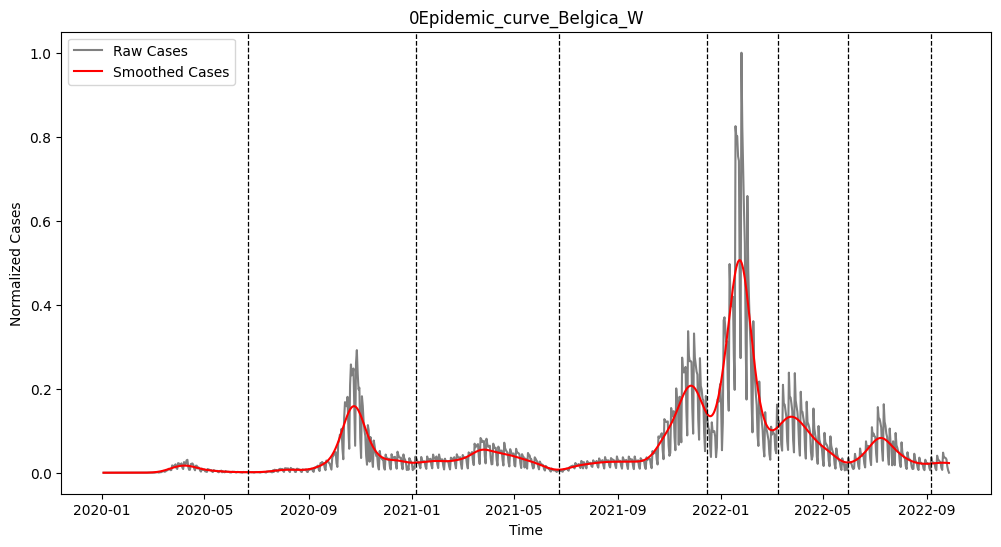

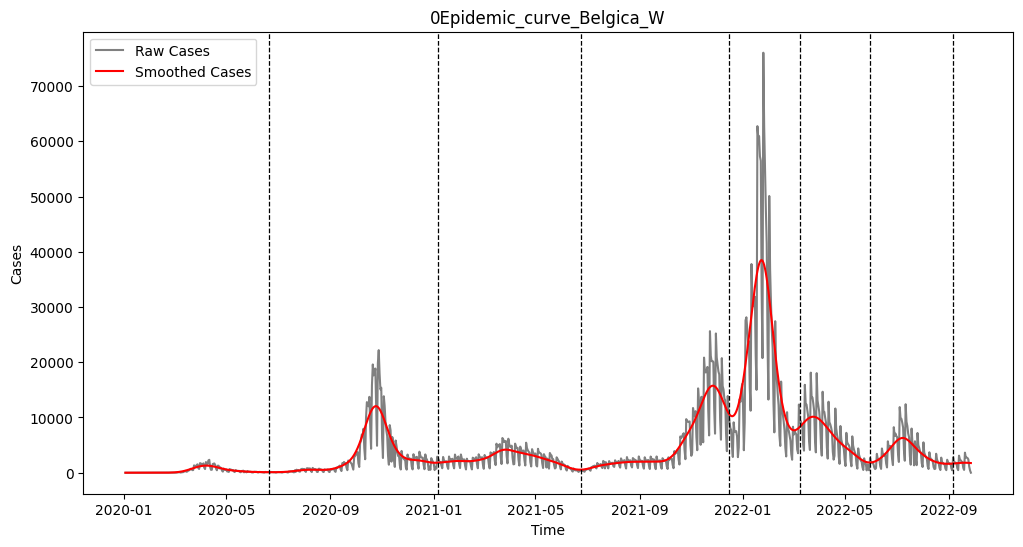

In [8]:
#this is an example of how you get the waves
example = waves(databaseBelgica,datesName,casesName,[configFile,"Code","BE","kernel1"],[configFile,"Code","BE","Kernel2"],plotNameW,dfNameW,outFolderPlot,outFolderDF)
example.run()

Now I will review the methods I will used to start adding the next methods that improve the peak-valleys detection

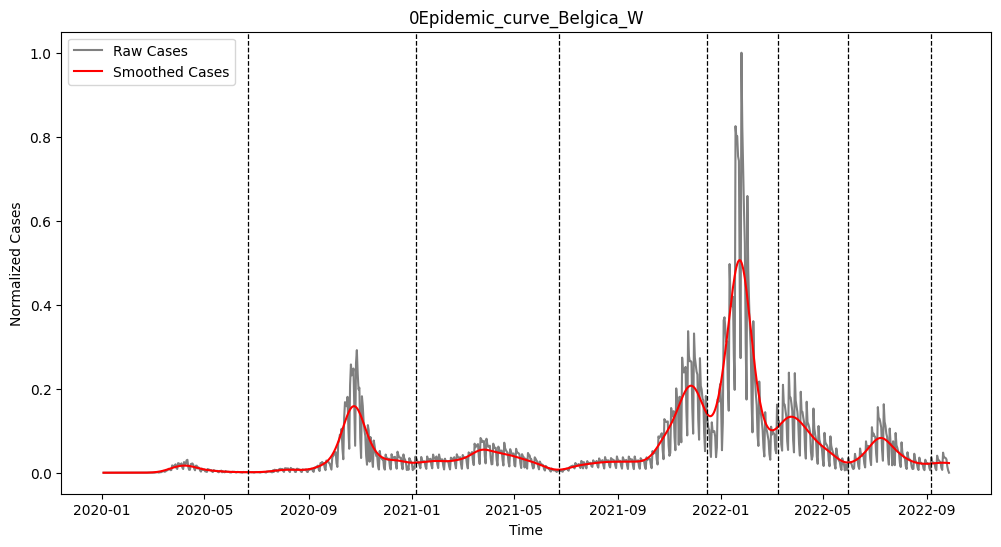

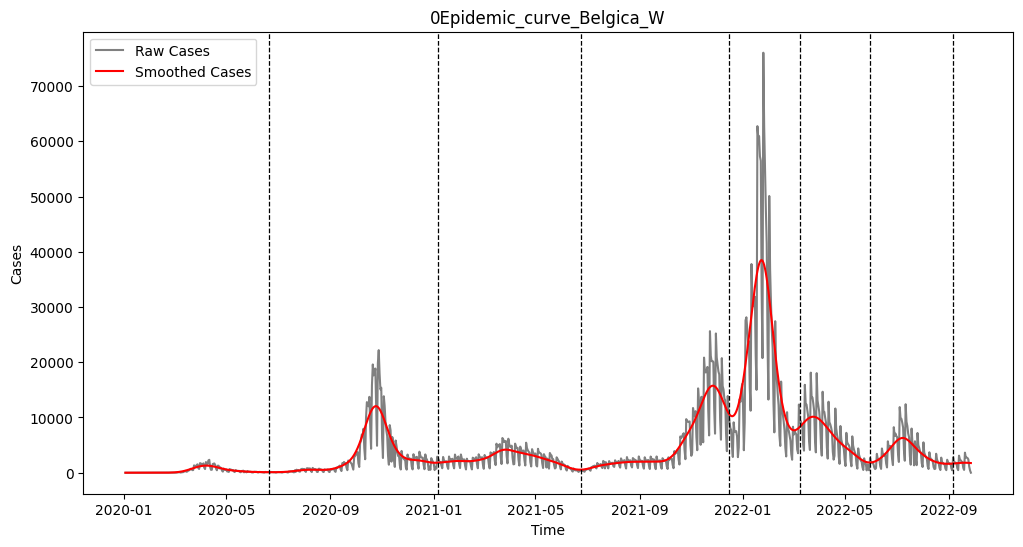

In [9]:
#Once I run this code all the method are run and the attributes created
#due to the run() method
w = waves(databaseCOLOMBIA,datesName,casesName,[configFile,"Code","BE","kernel1"],[configFile,"Code","BE","Kernel2"],plotNameW,dfNameW,outFolderPlot,outFolderDF)
w.run()

In [10]:
#so after the previous code the df is complete
w.df.head(3)

,Date_reported,Country_code,Country,New_cases,NormalizedCases,gaussian,SmoothedNCases,SmoothedCases,FirstDerivate,FirstDerivateSmoothed,SecondDerivate,rollingFDS,cutDatesW
0,2020-01-03,BE,Belgium,0,0.0,0.0,2.007653e-09,0.000153,NaN,9.663470e-09,NaN,False,0
1,2020-01-04,BE,Belgium,0,0.0,0.0,2.731532e-09,0.000208,7.238792e-10,1.089674e-08,1.233267e-09,0.0,0
2,2020-01-05,BE,Belgium,0,0.0,0.0,3.698076e-09,0.000281,9.665445e-10,1.237858e-08,1.481846e-09,0.0,0


In [11]:
w.idenCutPointsW("FirstDerivateSmoothed","rollingFDS")

In [12]:
w.df[["rollingFDS"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rollingFDS  999 non-null    object
dtypes: object(1)
memory usage: 7.9+ KB


In [27]:
w.df[["rollingFDS"]].value_counts()

rollingFDS
False         995
1.0             4
dtype: int64

In [13]:
w.df[["rollingFDS"]].head(10)

,rollingFDS
0,False
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [31]:
w.df[["rollingFDS"]].iloc[1]

rollingFDS    0.0
Name: 1, dtype: object

In [14]:
w.df[w.df["rollingFDS"]==1]

,Date_reported,Country_code,Country,New_cases,NormalizedCases,gaussian,SmoothedNCases,SmoothedCases,FirstDerivate,FirstDerivateSmoothed,SecondDerivate,rollingFDS,cutDatesW
171,2020-06-22,BE,Belgium,20,0.000263,0.000000e+00,0.001251,95.096807,-0.000007,0.000004,0.000005,1.0,0
369,2021-01-06,BE,Belgium,2625,0.034524,0.000000e+00,0.023879,1815.633742,0.000097,0.000005,0.000019,1.0,1
539,2021-06-25,BE,Belgium,339,0.004459,0.000000e+00,0.007394,562.163642,0.000106,0.000030,0.000040,1.0,0
713,2021-12-16,BE,Belgium,9284,0.122103,3.214433e-178,0.138762,10550.659823,-0.002847,0.000278,0.000415,1.0,0
797,2022-03-10,BE,Belgium,9407,0.123721,1.429862e-89,0.110905,8432.581773,0.002060,0.000144,0.000193,1.0,0
879,2022-05-31,BE,Belgium,2667,0.035076,1.363735e-32,0.024274,1845.620455,-0.000026,0.000007,0.000108,1.0,1
977,2022-09-06,BE,Belgium,2754,0.036221,8.459244e-03,0.021835,1660.220541,0.000160,0.000003,0.000016,1.0,1


In [35]:
w.idenPreviousDates("rollingFDS","FirstDerivateSmoothed")

In [16]:
w.df.head(5)

,Date_reported,Country_code,Country,New_cases,NormalizedCases,gaussian,SmoothedNCases,SmoothedCases,FirstDerivate,FirstDerivateSmoothed,SecondDerivate,rollingFDS,cutDatesW
0,2020-01-03,BE,Belgium,0,0.0,0.0,2.007653e-09,0.000153,NaN,9.663470e-09,NaN,False,0
1,2020-01-04,BE,Belgium,0,0.0,0.0,2.731532e-09,0.000208,7.238792e-10,1.089674e-08,1.233267e-09,0.0,0
2,2020-01-05,BE,Belgium,0,0.0,0.0,3.698076e-09,0.000281,9.665445e-10,1.237858e-08,1.481846e-09,0.0,0
3,2020-01-06,BE,Belgium,0,0.0,0.0,4.980269e-09,0.000379,1.282193e-09,1.417424e-08,1.795662e-09,0.0,0
4,2020-01-07,BE,Belgium,0,0.0,0.0,6.669382e-09,0.000507,1.689113e-09,1.636803e-08,2.193781e-09,0.0,0


Now those methods will be review from kabuPeaksValleys.py

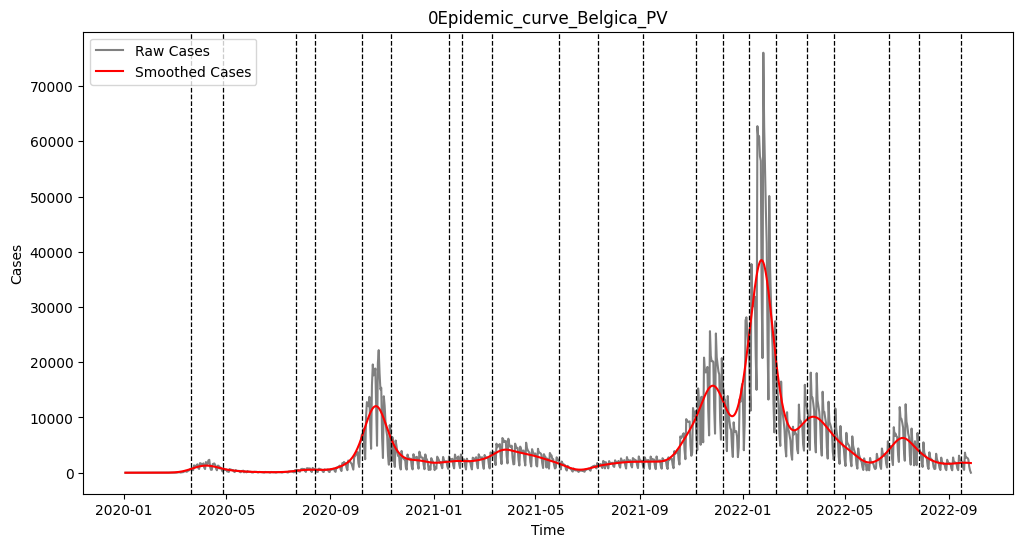

In [8]:
#Instance
pv = peaksValleys(databaseBelgica,datesName,casesName,[configFile,"Code","BE","kernel1"],[configFile,"Code","BE","Kernel2"],plotNamePV,dfNamePV,outFolderPlot,outFolderDF)

#running all the methods to make the final plot
#I made it in this way because the run() already have the new method

#those are the methods of curves class
pv.stansardizingDates()
pv.curveNormalization(pv.cN,"NormalizedCases")
pv.curveSmoothing2("NormalizedCases","SmoothedNCases",pv.kernel1)
pv.curveSmoothing2(pv.cN,"SmoothedCases",pv.kernel1)
pv.discreteDerivative("SmoothedNCases","FirstDerivate")
pv.curveSmoothing2("FirstDerivate","FirstDerivateSmoothed",pv.kernel2)
pv.discreteDerivative("FirstDerivateSmoothed","SecondDerivate")

#those are the methods from this class
pv.idenCutPointsPV("SecondDerivate","rollingSD")
pv.idenPreviousDatesPV("rollingSD","SecondDerivate")

#those are the methods from detecting waves class
pv.idenCutPointsW("FirstDerivateSmoothed","rollingFDS")
pv.idenPreviousDatesW("rollingFDS","FirstDerivateSmoothed")

#this is the new method that filters the cutDatesPV0
#pv.filteringCutDatePV()

pv.plottingTheCurveNoNormalized(pv.cutDatesPV)


In [9]:
pv.df.head(10)

,Date_reported,Country_code,Country,New_cases,NormalizedCases,gaussian,SmoothedNCases,SmoothedCases,FirstDerivate,FirstDerivateSmoothed,SecondDerivate,rollingSD,cutDatesPV0,rollingFDS,cutDatesW,cutDatesW2,peaksDates,cutDatesPV
0,2020-01-03,BE,Belgium,0,0.0,0.0,2.007653e-09,0.000153,NaN,9.663470e-09,NaN,False,0,False,0,0,0,0
1,2020-01-04,BE,Belgium,0,0.0,0.0,2.731532e-09,0.000208,7.238792e-10,1.089674e-08,1.233267e-09,False,0,0.0,0,0,0,0
2,2020-01-05,BE,Belgium,0,0.0,0.0,3.698076e-09,0.000281,9.665445e-10,1.237858e-08,1.481846e-09,0.0,0,0.0,0,0,0,0
3,2020-01-06,BE,Belgium,0,0.0,0.0,4.980269e-09,0.000379,1.282193e-09,1.417424e-08,1.795662e-09,0.0,0,0.0,0,0,0,0
4,2020-01-07,BE,Belgium,0,0.0,0.0,6.669382e-09,0.000507,1.689113e-09,1.636803e-08,2.193781e-09,0.0,0,0.0,0,0,0,0
5,2020-01-08,BE,Belgium,0,0.0,0.0,8.878027e-09,0.000675,2.208645e-09,1.906888e-08,2.700849e-09,0.0,0,0.0,0,0,0,0
6,2020-01-09,BE,Belgium,0,0.0,0.0,1.174309e-08,0.000893,2.865061e-09,2.241749e-08,3.348616e-09,0.0,0,0.0,0,0,0,0
7,2020-01-10,BE,Belgium,0,0.0,0.0,1.542821e-08,0.001173,3.685123e-09,2.659530e-08,4.177812e-09,0.0,0,0.0,0,0,0,0
8,2020-01-11,BE,Belgium,0,0.0,0.0,2.012546e-08,0.001530,4.697246e-09,3.183575e-08,5.240447e-09,0.0,0,0.0,0,0,0,0
9,2020-01-12,BE,Belgium,0,0.0,0.0,2.605560e-08,0.001981,5.930146e-09,3.843834e-08,6.602589e-09,0.0,0,0.0,0,0,0,0


In [10]:
df = pv.df

Now that we have the cutDatesW and cutDatesPV, we will create the new method

In [6]:
df["cutDatesW"].value_counts()

0    992
1      7
Name: cutDatesW, dtype: int64

In [27]:
op1=(df["cutDatesW"] == 1).cumsum()
op2=df["cutDatesW"].cumsum()

In [29]:
(op1==op2).value_counts()

True    999
Name: cutDatesW, dtype: int64

In [8]:
#step1: building the groups
df.loc[:,"cutDatesW2"]=df["cutDatesW"].cumsum()
df.head(3)

,Date_reported,Country_code,Country,New_cases,NormalizedCases,gaussian,SmoothedNCases,SmoothedCases,FirstDerivate,FirstDerivateSmoothed,SecondDerivate,rollingSD,cutDatesPV,rollingFDS,cutDatesW,cutDatesW2
0,2020-01-03,BE,Belgium,0,0.0,0.0,2.007653e-09,0.000153,NaN,9.663470e-09,NaN,False,0,False,0,0
1,2020-01-04,BE,Belgium,0,0.0,0.0,2.731532e-09,0.000208,7.238792e-10,1.089674e-08,1.233267e-09,False,0,0.0,0,0
2,2020-01-05,BE,Belgium,0,0.0,0.0,3.698076e-09,0.000281,9.665445e-10,1.237858e-08,1.481846e-09,0.0,0,0.0,0,0


In [9]:
#step2: getting the peaks dates
peaksDates = df.groupby(df["cutDatesW2"]).apply(
    lambda x :
    x[x[casesName]==max(x[casesName])][datesName]
)
print(type(peaksDates))
print(peaksDates[0])
peaksDates

<class 'pandas.core.series.Series'>
99   2020-04-11
Name: Date_reported, dtype: datetime64[ns]


cutDatesW2     
0           99    2020-04-11
1           299   2020-10-28
2           445   2021-03-23
3           690   2021-11-23
4           753   2022-01-25
5           809   2022-03-22
6           921   2022-07-12
7           991   2022-09-20
Name: Date_reported, dtype: datetime64[ns]

In [15]:
#step3: crating the peaksDates column in the df
df["peaksDates"] = df[datesName].isin(peaksDates).astype(int)
df.head(2)

,Date_reported,Country_code,Country,New_cases,NormalizedCases,gaussian,SmoothedNCases,SmoothedCases,FirstDerivate,FirstDerivateSmoothed,SecondDerivate,rollingSD,cutDatesPV,rollingFDS,cutDatesW,cutDatesW2,peaksDates
0,2020-01-03,BE,Belgium,0,0.0,0.0,2.007653e-09,0.000153,NaN,9.663470e-09,NaN,False,0,False,0,0,0
1,2020-01-04,BE,Belgium,0,0.0,0.0,2.731532e-09,0.000208,7.238792e-10,1.089674e-08,1.233267e-09,False,0,0.0,0,0,0


In [42]:
df[df["peaksDates"]==1][datesName]

99    2020-04-11
299   2020-10-28
445   2021-03-23
690   2021-11-23
753   2022-01-25
809   2022-03-22
921   2022-07-12
991   2022-09-20
Name: Date_reported, dtype: datetime64[ns]

In [28]:
#step 4:selecting the positions/dates in cutDatesPV that are closest 
#to the peaksDates

In [26]:
def subtraction(serie,timestamp):
    
    """serie of dates and a date in TimeStamp format"""

    subtraction = serie-timestamp
    #gets the difference in days between each date of the serie and a the TimeStamp date
    subtraction2 = [td.days for td in subtraction]
    #gets the days of the differences
    
    zipping = list(zip(serie,subtraction2))
    
    pos = [i for i in zipping if i[1]>0]
    neg = [i for i in zipping if i[1]<0]
    #separates positive differences from negative ones
    
    if len(pos)==0:
        minPos = [[],[]]
        #a format to avoid mistakes if the are not positive differences 
    
    elif len(pos)==1:
        minPos = pos[0]
        #if there is only one positive
    else:
        minPos=3
        minPos = min(pos, key = lambda x: x[1])
        
    if len(neg)== []:
        maxNeg = [[],[]]
    else:
        maxNeg = 3
        maxNeg = max(neg, key = lambda x: x[1])
    
    return [minPos[0],maxNeg[0]]
    #returns the lowest positive and the biggest negative


In [29]:
filteredPVCutDates = df.groupby(df["cutDatesW2"]).apply(
    lambda x:
    subtraction(
        x[x["cutDatesPV"]==1]["Date_reported"],
        x[x["peaksDates"]==1]["Date_reported"].iloc[0])
)

In [39]:
listCutDatesPVfilt=[item for sublist in filteredPVCutDates for item in sublist if item]
listCutDatesPVfilt

[Timestamp('2020-04-27 00:00:00'),
 Timestamp('2020-03-20 00:00:00'),
 Timestamp('2020-11-11 00:00:00'),
 Timestamp('2020-10-08 00:00:00'),
 Timestamp('2021-05-29 00:00:00'),
 Timestamp('2021-03-11 00:00:00'),
 Timestamp('2021-12-08 00:00:00'),
 Timestamp('2021-11-07 00:00:00'),
 Timestamp('2022-02-09 00:00:00'),
 Timestamp('2022-01-08 00:00:00'),
 Timestamp('2022-04-18 00:00:00'),
 Timestamp('2022-03-17 00:00:00'),
 Timestamp('2022-07-28 00:00:00'),
 Timestamp('2022-06-22 00:00:00'),
 Timestamp('2022-09-15 00:00:00')]

In [40]:
#step4: creating the peaksDates column in the df
df["cutDayPVFiltered"] = df[datesName].isin(listCutDatesPVfilt).astype(int)
df.head(2)

,Date_reported,Country_code,Country,New_cases,NormalizedCases,gaussian,SmoothedNCases,SmoothedCases,FirstDerivate,FirstDerivateSmoothed,SecondDerivate,rollingSD,cutDatesPV,rollingFDS,cutDatesW,cutDatesW2,peaksDates,cutDayPVFiltered
0,2020-01-03,BE,Belgium,0,0.0,0.0,2.007653e-09,0.000153,NaN,9.663470e-09,NaN,False,0,False,0,0,0,0
1,2020-01-04,BE,Belgium,0,0.0,0.0,2.731532e-09,0.000208,7.238792e-10,1.089674e-08,1.233267e-09,False,0,0.0,0,0,0,0


In [41]:
df[df["cutDayPVFiltered"]==1][datesName].info()

<class 'pandas.core.series.Series'>
Int64Index: 15 entries, 77 to 986
Series name: Date_reported
Non-Null Count  Dtype         
--------------  -----         
15 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 240.0 bytes


Jus trying to plot the "listCutDatesPVfilt"

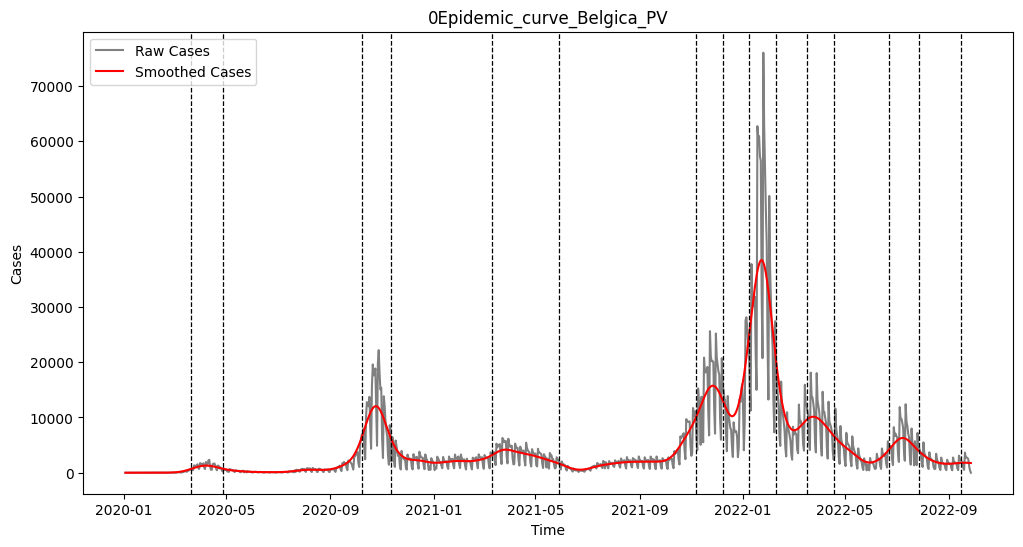

In [49]:
pv.plottingTheCurveNoNormalized(listCutDatesPVfilt)

After incorporate the new method in the Library

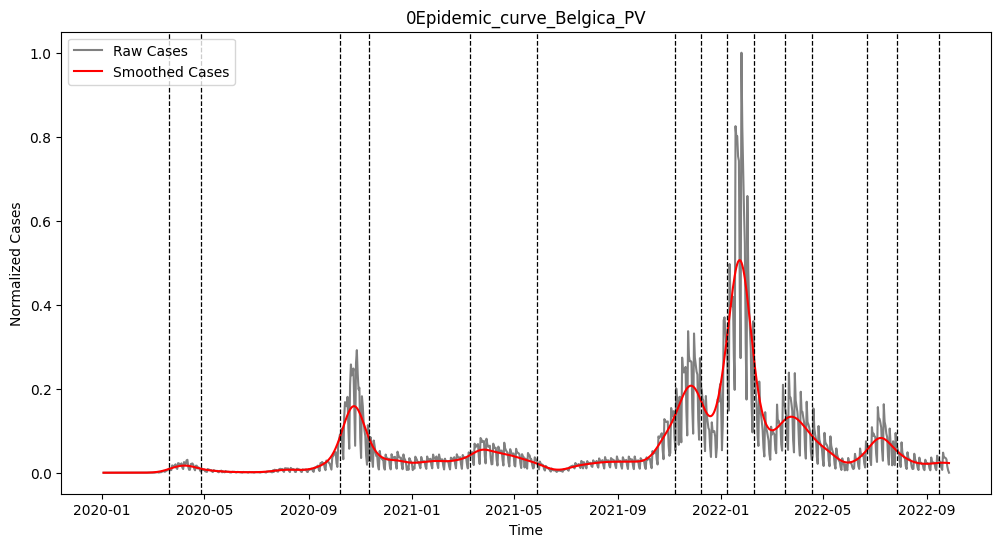

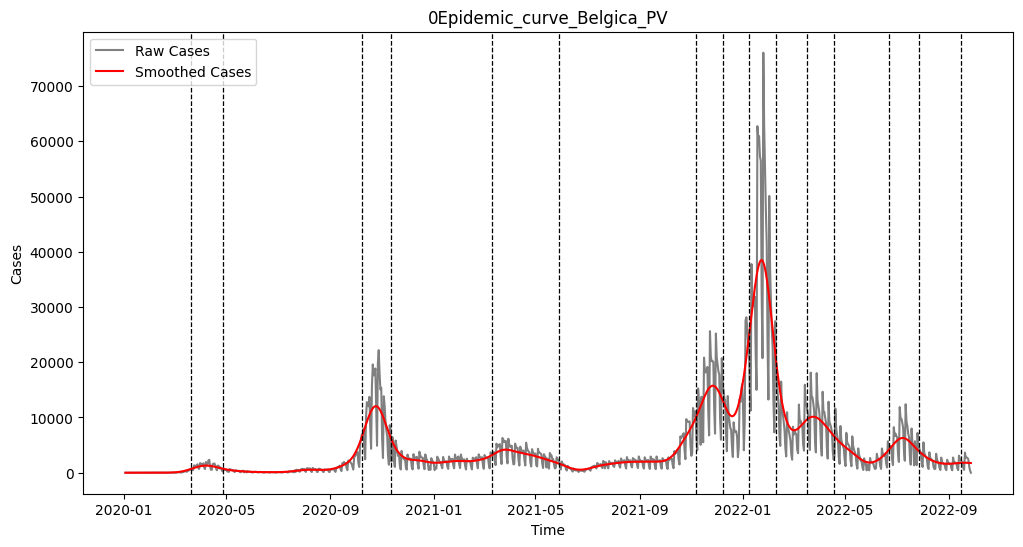

In [11]:
#Instance
pv = peaksValleys(databaseBelgica,datesName,casesName,[configFile,"Code","BE","kernel1"],[configFile,"Code","BE","Kernel2"],plotNamePV,dfNamePV,outFolderPlot,outFolderDF)
pv.run()